## **Principles and Practice: Data Understanding**
#### For the book **The Applied ML Field Manual by Prithiviraj Damodaran**
----

#### **[Exercise Notebook] COVID-19 Impact on Community Mobility - Analysis based on Apple dataset**

* Please downlad the dataset from [here](https://www.apple.com/covid19/mobility)
* ONLY a handful countires which are either touted as a model for fighting COVID-19 or the ones which are heavily impacted.
* The dataset I downloaded was dated between 13-Jan-2020 to 01-May-2020

<center> <img src="./images/Apple Dataset.png" style="width:500px;height:250px"></img></center>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd

#### Note: You need this ONLY if you want a continent wise plot

In [3]:
country2continent = pd.read_csv("countries2continents.csv").fillna('')
country2continent = country2continent[['name', 'region']]
country2continent.set_index('name',inplace=True)
country2continent = country2continent.to_dict()['region']

#### Peek at the data: 

* It is timeseries data with a columnwise schema
* No missing values

In [19]:
df = apple_mob.isna().any().to_frame()
df[df[0]==True].count()[0]

0

In [21]:
apple_mob = pd.read_csv("applemobilitytrends-2020-05-01.csv")
apple_mob = apple_mob[(apple_mob['geo_type'] == 'country/region') & (apple_mob['region'].isin(['Germany','United States','UK', 'Spain', 'Italy', 'China', 'India','Taiwan', 'South Korea']))]
top_countries = apple_mob[(apple_mob['geo_type'] == 'country/region')]
top_countries.sample(5)

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
146,country/region,United States,driving,US,100.0,102.97,105.19,108.48,125.51,115.04,...,66.49,68.00,76.68,72.62,57.06,68.77,71.33,71.86,74.98,88.50
57,country/region,India,walking,भारत,100.0,99.18,104.08,107.41,113.91,128.02,...,25.55,24.78,24.67,24.71,25.32,26.66,26.13,26.04,26.21,27.86
47,country/region,Germany,walking,Deutschland,100.0,104.04,107.18,110.76,124.13,137.91,...,68.86,72.15,68.32,72.98,81.52,70.04,59.81,59.04,60.08,59.29
141,country/region,UK,walking,United Kingdom,100.0,106.14,114.37,112.59,128.99,157.81,...,46.54,46.36,49.85,49.52,44.12,41.46,35.33,37.80,37.29,44.94
140,country/region,UK,transit,United Kingdom,100.0,104.20,105.37,103.89,109.38,115.05,...,17.04,16.97,16.63,16.37,16.96,17.53,16.65,16.79,16.48,17.21


#### Add continent dimension

In [22]:
top_countries['continent'] = top_countries.apply(lambda row : country2continent.get(row['region']), axis=1, result_type="expand")

#### Convert column bases schema into a row based schema for the time series values

In [25]:
top_countries_ts = pd.melt(top_countries, id_vars=["region", "continent"], var_name="Date", value_name="Value")
top_countries_ts = top_countries_ts[~(top_countries_ts['Value'].str.isnumeric() == False)]
top_countries_ts.head()

,region,continent,Date,Value
60,Germany,Europe,2020-01-13,100
61,Germany,Europe,2020-01-13,100
62,Germany,Europe,2020-01-13,100
63,India,Asia,2020-01-13,100
64,India,Asia,2020-01-13,100


#### Convert datatypes of dates and extract months

In [26]:
top_countries_ts['Value'] = top_countries_ts['Value'].astype('float')
top_countries_ts['Date'] = pd.to_datetime(top_countries_ts['Date'])
top_countries_ts['month'] = top_countries_ts['Date'].dt.month

In [27]:
top_countries_monthly = top_countries_ts.groupby(['region', 'month'])['Value'].agg('sum').reset_index()

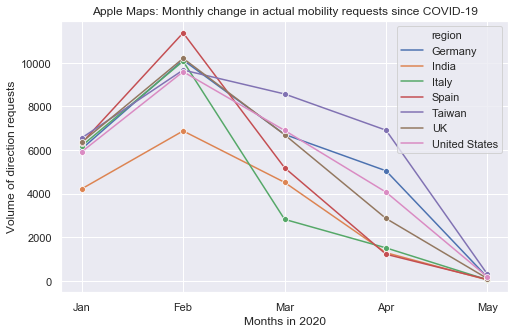

In [29]:
#automobile_monthly.plot(x='month', y='Value', style='.-', markevery=10)
plt.xticks([1,2,3,4,5], ["Jan", "Feb", "Mar","Apr","May"])
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lineplot(data=top_countries_monthly, x='month', marker="o", y='Value', hue='region')
ax.set(xlabel='Months in 2020', ylabel='Volume of direction requests')
ax.set(title='Apple Maps: Monthly change in actual mobility requests since COVID-19')
plt.show()

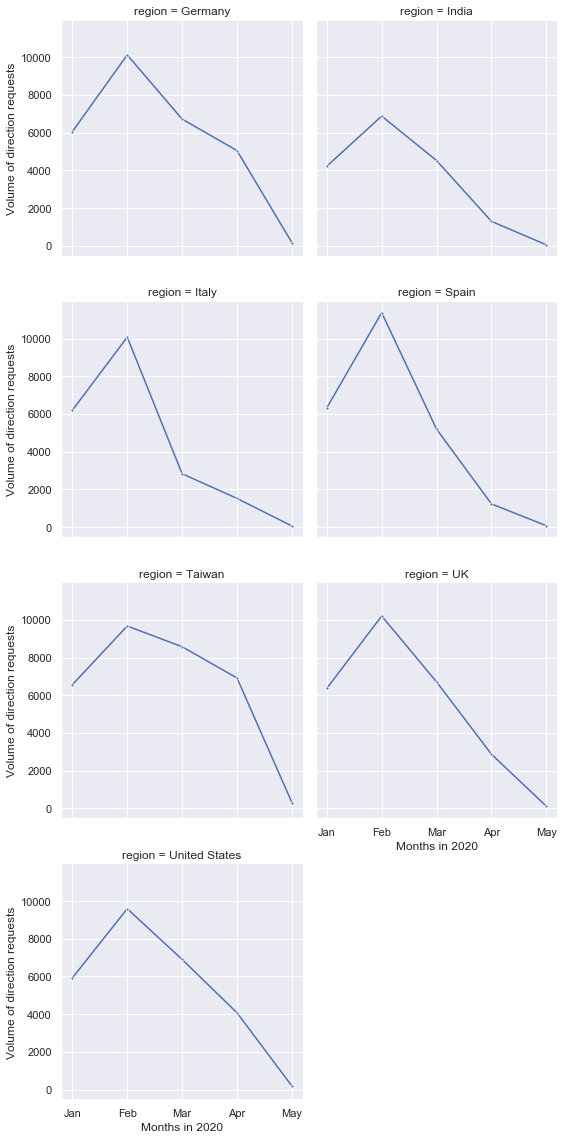

In [31]:
g = sns.FacetGrid(top_countries_monthly, col="region", col_wrap=2, height=4, size=4, aspect=1)
g = g.map(sns.lineplot, "month", "Value", marker=".")
g.set(xticklabels=["Jan", "Feb", "Mar","Apr","May"])
g.set(xticks=[1,2,3,4,5])
g.set(xlabel='Months in 2020', ylabel='Volume of direction requests')
plt.show()